# 获取数据

### 获取雷达切面数据

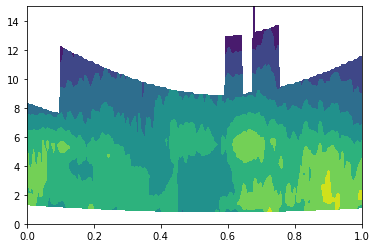

In [12]:
import cinrad
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
f = cinrad.io.CinradReader('Z_RADR_I_Z9576_20190810000600_O_DOR_SA_CAP.bin.bz2')
# rl = [f.get_data(i, 230, 'VEL') for i in f.angleindex_r]
rl = [f.get_data(i, 230, 'REF') for i in f.angleindex_r]
vcs = cinrad.easycalc.VCS(rl)
vcs.get_section(start_polar=(0, 0), end_polar=(230, 330))
s1 = vcs.get_section(start_cart=(121, 28.1), end_cart=(121, 29.0))
data = s1.data
xcor = s1.xcor
ycor = s1.ycor
fig, ax = plt.subplots()

#x.pcolormesh(xcor, ycor, data)
ax.contourf(xcor, ycor, data)
ax.set_ylim(0, 15)
plt.show()

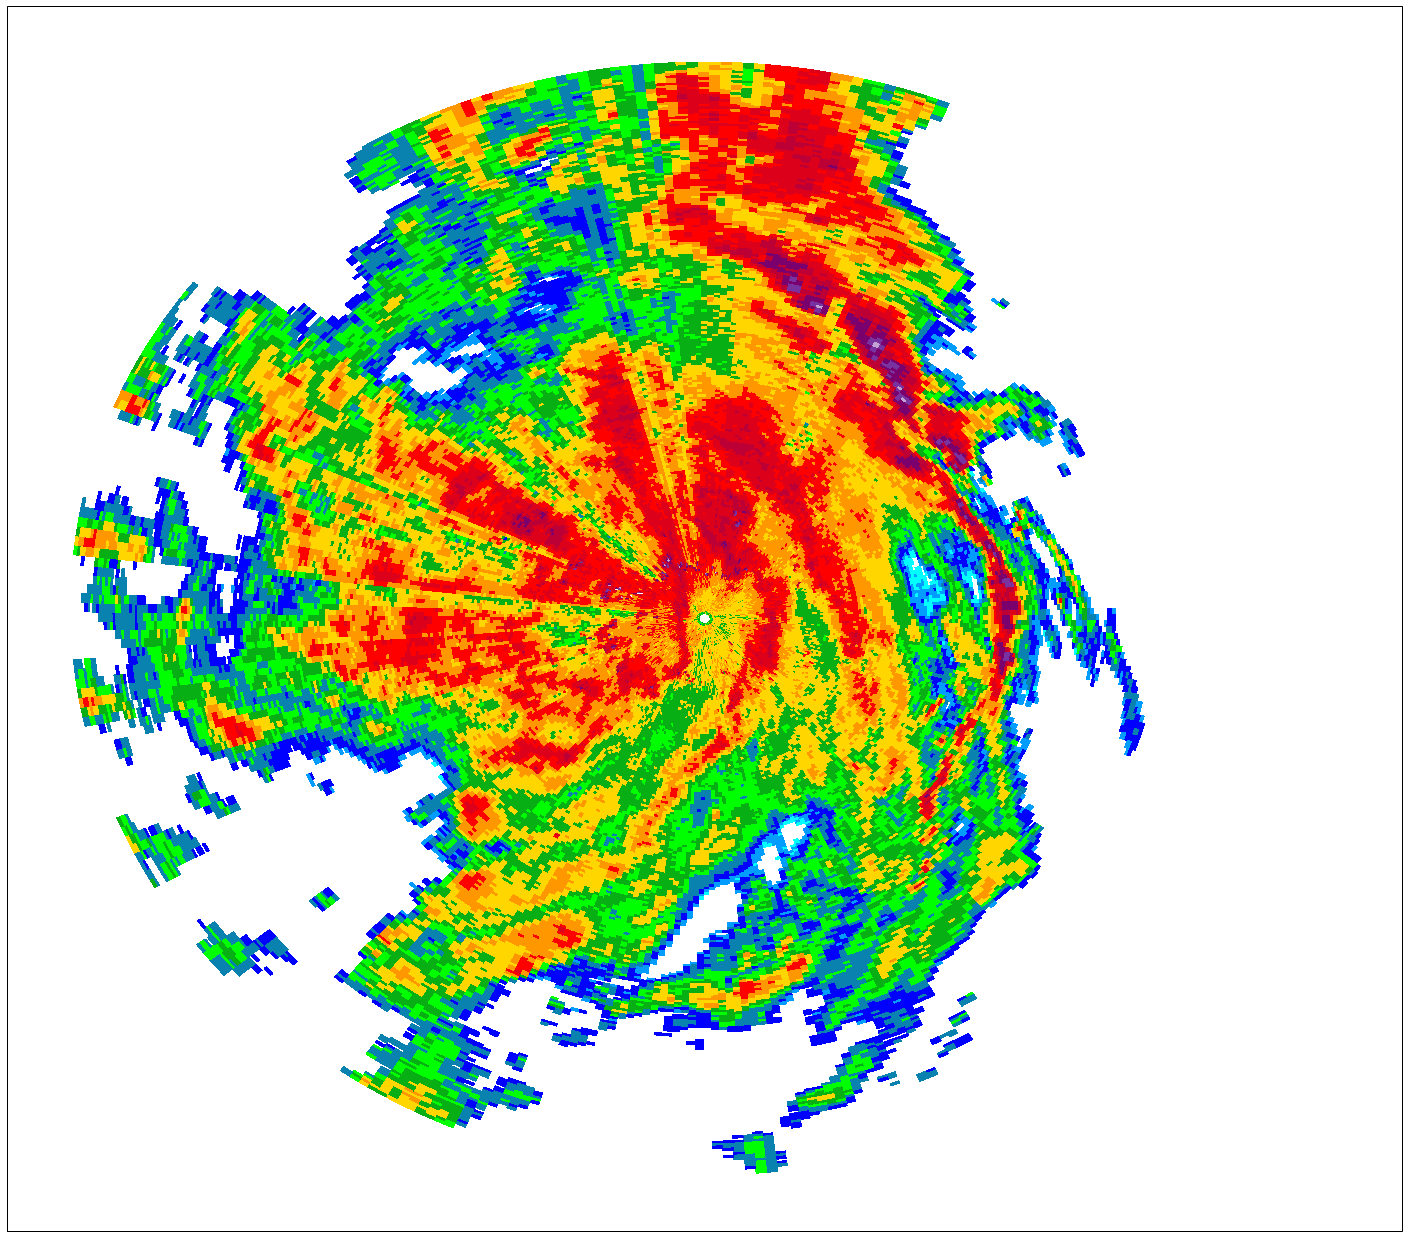

In [11]:
import cinrad
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
from matplotlib import cm, colors

# 雷达图的矢量图的rgb
fid = open('radar.rgb')
data=fid.readlines()
n=len(data);
#print(n)
rgb=np.zeros((n,3))
for i in np.arange(n):
    #print(data[0].split(' '))
    rgb[i][0]=float(data[i].split(' ')[0])
    rgb[i][1]=data[i].split(' ')[1]
    rgb[i][2]=data[i].split(' ')[2]
# print((rgb.shape))
#print(rgb[253])
cmaps= colors.ListedColormap(rgb)


f = cinrad.io.CinradReader('Z_RADR_I_Z9576_20190810000600_O_DOR_SA_CAP.bin.bz2')
tilt_number = 0
data_radius = 230
data_dtype = 'REF' # stands for reflectivity
# 数据加载核心
ra = f.get_data(tilt_number, data_radius, data_dtype)
data = ra.data
values = data
azimuths = np.radians(np.linspace(0, 360, 366))
zeniths = np.arange(0, 230, 1)
r, theta = np.meshgrid(zeniths, azimuths)
fig = plt.figure(figsize=(25, 25))
ax = plt.axes(projection=ccrs.PlateCarree())
# 核心绘图代码
ax.pcolormesh(ra.lon, ra.lat, values,cmap=cmaps )